#Alinhamento múltiplo de sequências com Clustal Omega

In [ ]:
!apt-get update
!apt-get install clustalo -y
!pip install biopython
from Bio.Align.Applications import ClustalOmegaCommandline

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,608 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,457 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,424

/usr/local/lib/python3.10/dist-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [ ]:
url = 'https://github.com/maritaortiz/Projeto_ICD/blob/55adfd2a6eb13a33762f43b176361addf29a074d/16SrRNA_sequences_complete.fa'

In [54]:
#ALINHAMENTO
!pip install wget
import wget

url = 'https://raw.githubusercontent.com/maritaortiz/Projeto_ICD/main/16SrRNA_sequences_complete.fa'
input_file = "16SrRNA_sequences_complete.fa"
output_file = "16sRNA_alinhamento_oficial"

wget.download(url, input_file)

clustalomega_cline = ClustalOmegaCommandline(infile=input_file, outfile=output_file, seqtype="DNA", verbose=True, auto=True, force=True)

stdout, stderr = clustalomega_cline()

In [ ]:
#MOSTRAR ALINHAMENTO NOVO
!pip install biopython
from Bio import SeqIO


file_name = '16sRNA_alinhamento_oficial'
sequences = SeqIO.parse(file_name, 'fasta')


for seq_record in sequences:
    print(f"ID: {seq_record.id}, Sequência: {seq_record.seq}, Comprimento: {len(seq_record)}")

ID: Drosophila_melanogaster, Sequência: ------------------------------------------------------------------------------------------------------------TTTAT----ATTAAT---------------A-ATA-TTCTTATAAAAAATATAATTATTTTGATATTTGGTCCTTTCGTACTAA-AATATCATAATTTTTTAAAGATAGAAACCAACC------------------------TGGCTTACACCGGTTTGAACTCAG------ATCATGTAAGAATTTAAAAGTCGAACAGACTTAAAATTTGAACGGCTACACCCAAAATTATATCTTAATCCAA-----------CATCGAGGTCGCAATCTTTTTT--------ATCGATATGAACTCT-----------CCAA------------AAAAATTACGCTGTTATCCCTAAAGTAACTTAATTTTTTAATCATTA-TTAATGGATCAAA--------------------TATTCATAAATTTATGTTTTTAAAAAATTAAAAGTTTT-TTAAATTTTAATATCACCCCAATAAAATATTTTTA----TT-------TATTAAAATTTAATTAATCTATATAAT--TAAAATAAAAAAAAATATAAAGATTTATAGGGTCTTCTCGTCTTTTAAA---TAAATTTTAGCTTTTTGACTAAAAAATAAAA-TTCTAT----AAAA-------ATTTTAAATGAAACAGTTAATATTTCGTCCAACCAT-----------------TCATTCCAGCCTTCAATTAAAAGACTAATGATTATGCTACCTTT------------GCACAGTCAAAATACTG-CGGCCA------TTTAAA----ATTTTCAGTGGGCAGGTTAG---ACTTTATA-TATAATTCAAAAAGACATGTTTTTGTT----AAACAGGCGA

##Calculando a matriz de distâncias euclidianas e gerando o dendograma pelo método de neighbor joining (alternativo)

In [ ]:
#MATRIZ DE DISTANCIAS EUCLIDIANAS
import numpy as np
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio import AlignIO
import pandas as pd

#Criação de matriz numpy
alignment_np= np.array([list(seq) for seq in alignment])
print(alignment_np)

#Converter alinhamento a matriz numérica
def convert_numerical(alignment):
  mapping= {'A': 0, 'C': 1, 'G': 2, 'T': 3, '-': 4, 'N': 5, 'W': 6}
  shape= alignment.shape
  for i in range(shape[0]):
    for j in range(shape[1]):
      alignment[i][j]= mapping[alignment[i][j]]
  return alignment

numeric_align=pd.DataFrame(convert_numerical(alignment_np))
print(numeric_align)

#Normalização dos dados:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
numeric_align_norm=pd.DataFrame(scaler.fit_transform(numeric_align), columns=numeric_align.columns)
print(numeric_align_norm)

#Calcular distância euclidiana
from sklearn.metrics.pairwise import euclidean_distances
distance_matrix=euclidean_distances(numeric_align_norm)
print(distance_matrix)

[['-' '-' '-' ... '-' '-' '-']
 ['-' '-' '-' ... '-' '-' '-']
 ['-' '-' '-' ... '-' '-' '-']
 ...
 ['-' '-' '-' ... '-' '-' '-']
 ['-' '-' '-' ... '-' '-' '-']
 ['-' '-' '-' ... '-' '-' '-']]
   0    1    2    3    4    5    6    7    8    9     ... 2081 2082 2083 2084  \
0     4    4    4    4    4    4    4    4    4    4  ...    4    4    4    4   
1     4    4    4    4    4    4    4    4    4    4  ...    4    4    4    4   
2     4    4    4    4    4    4    4    4    4    4  ...    4    4    4    4   
3     4    4    4    4    4    4    4    4    4    4  ...    4    4    4    4   
4     4    4    4    4    4    4    4    4    4    4  ...    4    4    4    4   
5     4    4    4    4    4    4    4    4    4    4  ...    4    4    4    4   
6     4    4    4    4    4    4    4    4    4    4  ...    4    4    4    4   
7     4    4    4    4    4    4    4    4    4    4  ...    4    4    4    4   
8     4    4    4    4    4    4    4    4    4    4  ...    3    4    4    4  

In [ ]:
#Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clustering.fit(numeric_align_norm)
cluster_labels_1 = clustering.labels_
print(cluster_labels_1)

[0 2 2 1 1 2 1 1 2 1 1 1 1 2 2 2 1 0 2 0 2 1 1 1 1 1 1 2 0 0 0 0 2 0 2 0 2
 2 0 0 0]


Text(0, 0.5, 'Organismos')

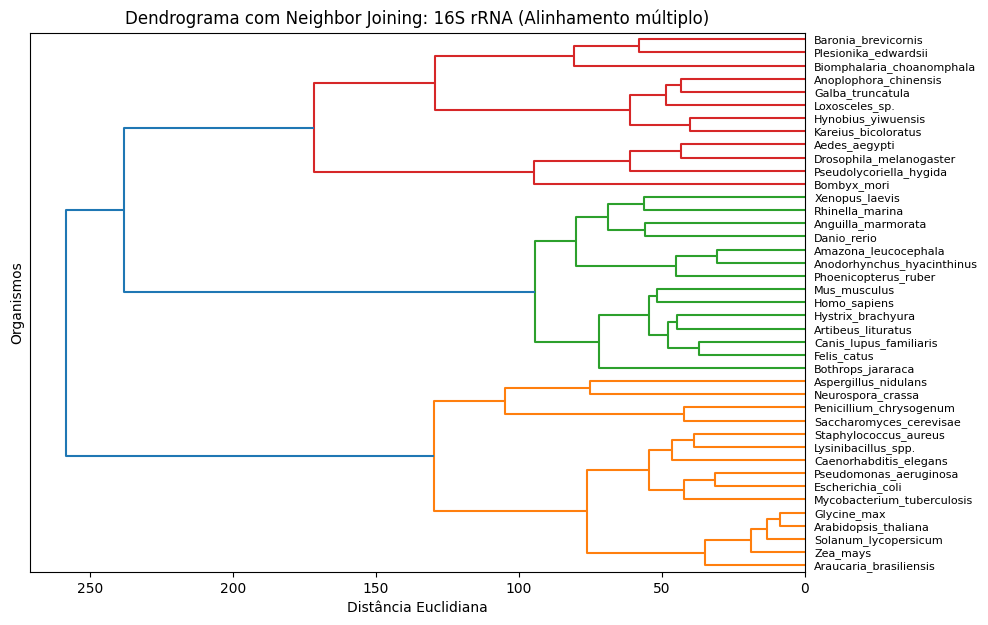

In [ ]:
#ARVORE_SKLEARN
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendrograma com Neighbor Joining: 16S rRNA (Alinhamento múltiplo)")
labels = [seq_record.id for seq_record in alignment]
dend = shc.dendrogram(shc.linkage(alignment_np, method='ward'), labels= labels, orientation='left')
plt.xlabel('Distância Euclidiana')
plt.ylabel('Organismos')

#Extração de características (frecuência de *k-mers*)

In [ ]:
!pip install scipy
!pip install scikit-bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 32.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 50.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-bio: filename=scikit_bio-0.6.2-cp310-cp310-linux_x86_64.whl size=3971923 sha256=8d5d5da8a5b602de20437a8b00112a55cf173a0f9dd8a8d093503d09181c66a7
  Stored in directory: /root/.cache/pip/wheels/f3/9c/ed/c2b94011fd3765a19330df93f81265e178098dd86c047c1566
  Created wheel for biom-format: filename=biom_format-2.1.16-cp310-cp310-linux_x86_64.whl size=12158975 sha256=ce0c2127cd60f817e9a77b2ab9645386dec780dbda39546a705690d7656b63e2
  Stored in directory: /root/.cache/pip/wheels/8e/a9/f9/197fd5a0e5bbab5f2e03c89194f6c194bed7af5d7a8c8759f3
Successf

In [ ]:
import skbio as sk
from skbio.sequence import DNA, Sequence
import scipy
import numpy as np
import pandas as pd

In [ ]:
#Ler as sequências
from skbio.io import read
seqs_generator = sk.io.read("/content/16SrRNA_sequences_complete.fa", format="fasta", constructor=Sequence)
seqs=list(seqs_generator)
for seq in seqs:
    print(f"ID: {seq.metadata['id']}")
    print(f"Secuencia: {seq}")
    print(f"Longitud: {len(seq)}")
    print()

ID: Drosophila_melanogaster
Secuencia: TTTATATTAATAATATTCTTATAAAAAATATAATTATTTTGATATTTGGTCCTTTCGTACTAAAATATCATAATTTTTTAAAGATAGAAACCAACCTGGCTTACACCGGTTTGAACTCAGATCATGTAAGAATTTAAAAGTCGAACAGACTTAAAATTTGAACGGCTACACCCAAAATTATATCTTAATCCAACATCGAGGTCGCAATCTTTTTTATCGATATGAACTCTCCAAAAAAATTACGCTGTTATCCCTAAAGTAACTTAATTTTTTAATCATTATTAATGGATCAAATATTCATAAATTTATGTTTTTAAAAAATTAAAAGTTTTTTAAATTTTAATATCACCCCAATAAAATATTTTTATTTATTAAAATTTAATTAATCTATATAATTAAAATAAAAAAAAATATAAAGATTTATAGGGTCTTCTCGTCTTTTAAATAAATTTTAGCTTTTTGACTAAAAAATAAAATTCTATAAAAATTTTAAATGAAACAGTTAATATTTCGTCCAACCATTCATTCCAGCCTTCAATTAAAAGACTAATGATTATGCTACCTTTGCACAGTCAAAATACTGCGGCCATTTAAAATTTTCAGTGGGCAGGTTAGACTTTATATATAATTCAAAAAGACATGTTTTTGTTAAACAGGCGAATATTATTTTTGCCGAATTCTTTATTTAAACTTTTCATATAAATTAATTTTAACATTATTATATACTAATTTTATCATTATTACTTAATTTTAATAATTAAAACTAACATTTTAATAAATAATTAAAATTTAATAAATAATTTAATTTATAAAATAAATTATAACATATTTTTTAATAATTGCTAATTCTAAGCATATATTTATTAAATCTATTTAATATTTTTAAAAATTTATTTTATAGCTTATCCCATAAAACATTAAAATTATAAATTAATTAATTAAATAAATAATTAAGTAAATT

In [ ]:
#Gerar a lista de k-mers
#set() é uma coleção não ordenada de elementos únicos
kmers= set()
for s in seqs:
  for k in s.iter_kmers(3, overlap=True):
    kmers.add(str(k))
print(kmers)
print(len(kmers))

{'AGC', 'TGC', 'AGT', 'AGA', 'GCW', 'GGN', 'TTG', 'GGA', 'ATG', 'GCC', 'NCN', 'ATT', 'TCA', 'CNT', 'CGG', 'WAG', 'ATA', 'ACN', 'GNC', 'CTG', 'TAA', 'TGN', 'CGT', 'CAC', 'GAT', 'NTA', 'TAC', 'TTC', 'AAC', 'GGG', 'TCC', 'AGG', 'NGT', 'GGC', 'TTN', 'TTA', 'TGT', 'GAA', 'CAA', 'CWA', 'GGT', 'TNT', 'GNG', 'CCA', 'TCT', 'ACT', 'GCG', 'TAG', 'TTT', 'GTC', 'CCC', 'GAC', 'CGC', 'TGA', 'AAT', 'GCT', 'GTT', 'TAT', 'CTC', 'CCG', 'NTT', 'AAG', 'TGG', 'TCG', 'CAT', 'GAG', 'CNG', 'CAG', 'CCT', 'WCA', 'AAA', 'ATC', 'ACG', 'CTA', 'TGW', 'GTG', 'CGA', 'ACA', 'GTA', 'ACC', 'GCA', 'CTT', 'GWC'}
83


In [ ]:
# Extração de características
# Contar as frequências de k-mers por sequência
data = []
for s in seqs:
  #cria um dicionário com a contagem de cada kmer para cada sequência
  counts = {k: s.count(k) for k in kmers}
  data.append(counts)
print(data)
df = pd.DataFrame(data)
df

[{'AGC': 4, 'TGC': 5, 'AGT': 8, 'AGA': 11, 'GCW': 0, 'GGN': 0, 'TTG': 9, 'GGA': 1, 'ATG': 8, 'GCC': 3, 'NCN': 0, 'ATT': 98, 'TCA': 18, 'CNT': 0, 'CGG': 3, 'WAG': 0, 'ATA': 71, 'ACN': 0, 'GNC': 0, 'CTG': 4, 'TAA': 115, 'TGN': 0, 'CGT': 3, 'CAC': 7, 'GAT': 9, 'NTA': 0, 'TAC': 14, 'TTC': 24, 'AAC': 28, 'GGG': 2, 'TCC': 7, 'AGG': 5, 'NGT': 0, 'GGC': 5, 'TTN': 0, 'TTA': 100, 'TGT': 5, 'GAA': 11, 'CAA': 17, 'CWA': 0, 'GGT': 6, 'TNT': 0, 'GNG': 0, 'CCA': 10, 'TCT': 20, 'ACT': 22, 'GCG': 2, 'TAG': 7, 'TTT': 78, 'GTC': 7, 'CCC': 4, 'GAC': 5, 'CGC': 2, 'TGA': 8, 'AAT': 104, 'GCT': 7, 'GTT': 9, 'TAT': 62, 'CTC': 4, 'CCG': 2, 'NTT': 0, 'AAG': 11, 'TGG': 4, 'TCG': 8, 'CAT': 20, 'GAG': 2, 'CNG': 0, 'CAG': 8, 'CCT': 6, 'WCA': 0, 'AAA': 79, 'ATC': 17, 'ACG': 3, 'CTA': 21, 'TGW': 0, 'GTG': 1, 'CGA': 7, 'ACA': 19, 'GTA': 5, 'ACC': 8, 'GCA': 4, 'CTT': 25, 'GWC': 0}, {'AGC': 30, 'TGC': 12, 'AGT': 23, 'AGA': 33, 'GCW': 0, 'GGN': 0, 'TTG': 15, 'GGA': 19, 'ATG': 15, 'GCC': 17, 'NCN': 0, 'ATT': 27, 'TCA': 26,

,AGC,TGC,AGT,AGA,GCW,GGN,TTG,GGA,ATG,GCC,...,CTA,TGW,GTG,CGA,ACA,GTA,ACC,GCA,CTT,GWC
0,4,5,8,11,0,0,9,1,8,3,...,21,0,1,7,19,5,8,4,25,0
1,30,12,23,33,0,0,15,19,15,17,...,38,0,8,15,34,21,56,24,20,0
2,25,7,25,36,0,0,16,19,16,13,...,46,0,12,12,29,19,32,16,23,0
3,33,28,25,18,0,0,13,46,26,33,...,15,0,32,20,20,24,18,27,15,0
4,28,28,26,27,0,0,26,44,28,26,...,12,0,32,17,15,26,26,29,24,0
5,33,8,28,42,0,0,13,24,13,23,...,30,0,15,19,36,21,38,21,17,0
6,21,24,28,25,0,0,47,38,24,23,...,23,0,25,24,16,25,20,21,42,0
7,30,20,21,21,0,0,18,46,24,25,...,17,1,33,21,12,23,26,32,16,1
8,29,11,26,38,0,0,16,18,19,17,...,39,0,13,16,35,17,39,21,24,0
9,27,18,28,18,0,0,23,37,21,23,...,17,0,32,17,22,25,22,23,18,0


In [ ]:
#Normalização
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler=MinMaxScaler()
normal_df=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
normal_df

,AGC,TGC,AGT,AGA,GCW,GGN,TTG,GGA,ATG,GCC,...,CTA,TGW,GTG,CGA,ACA,GTA,ACC,GCA,CTT,GWC
0,0.071429,0.115385,0.052632,0.054054,0.0,0.0,0.136364,0.000000,0.121212,0.06250,...,0.404762,0.0,0.000000,0.222222,0.347826,0.085714,0.107692,0.096774,0.564103,0.0
1,0.690476,0.384615,0.447368,0.648649,0.0,0.0,0.272727,0.367347,0.333333,0.50000,...,0.809524,0.0,0.170732,0.518519,0.673913,0.542857,0.846154,0.741935,0.435897,0.0
2,0.571429,0.192308,0.500000,0.729730,0.0,0.0,0.295455,0.367347,0.363636,0.37500,...,1.000000,0.0,0.268293,0.407407,0.565217,0.485714,0.476923,0.483871,0.512821,0.0
3,0.761905,1.000000,0.500000,0.243243,0.0,0.0,0.227273,0.918367,0.666667,1.00000,...,0.261905,0.0,0.756098,0.703704,0.369565,0.628571,0.261538,0.838710,0.307692,0.0
4,0.642857,1.000000,0.526316,0.486486,0.0,0.0,0.522727,0.877551,0.727273,0.78125,...,0.190476,0.0,0.756098,0.592593,0.260870,0.685714,0.384615,0.903226,0.538462,0.0
5,0.761905,0.230769,0.578947,0.891892,0.0,0.0,0.227273,0.469388,0.272727,0.68750,...,0.619048,0.0,0.341463,0.666667,0.717391,0.542857,0.569231,0.645161,0.358974,0.0
6,0.476190,0.846154,0.578947,0.432432,0.0,0.0,1.000000,0.755102,0.606061,0.68750,...,0.452381,0.0,0.585366,0.851852,0.282609,0.657143,0.292308,0.645161,1.000000,0.0
7,0.690476,0.692308,0.394737,0.324324,0.0,0.0,0.340909,0.918367,0.606061,0.75000,...,0.309524,1.0,0.780488,0.740741,0.195652,0.600000,0.384615,1.000000,0.333333,1.0
8,0.666667,0.346154,0.526316,0.783784,0.0,0.0,0.295455,0.346939,0.454545,0.50000,...,0.833333,0.0,0.292683,0.555556,0.695652,0.428571,0.584615,0.645161,0.538462,0.0
9,0.619048,0.615385,0.578947,0.243243,0.0,0.0,0.454545,0.734694,0.515152,0.68750,...,0.309524,0.0,0.756098,0.592593,0.413043,0.657143,0.323077,0.709677,0.384615,0.0


In [ ]:
#Calcular a matriz de distâncias
from scipy.spatial.distance import pdist, squareform
distancia= pdist(normal_df, metric='euclidean')

distancia_qc= squareform(distancia)
distancia_df = pd.DataFrame(distancia_qc, index=normal_df.index, columns=normal_df.index)
distancia_df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.000000,3.950226,2.931904,4.898783,4.764361,3.590820,4.144964,5.042030,3.268682,4.254985,...,4.197850,3.978071,2.685998,3.178669,2.065918,3.297794,3.651644,2.799277,1.714342,2.170559
1,3.950226,0.000000,2.208833,3.457784,3.295494,2.160160,3.109548,3.850608,2.023367,3.062732,...,5.324036,2.183641,4.197978,2.031895,3.782988,2.043125,1.983016,3.566912,4.275053,4.402417
2,2.931904,2.208833,0.000000,3.284130,3.080474,1.301512,2.519555,3.673681,0.808198,2.687874,...,4.761391,1.654711,3.520713,1.018278,2.837644,0.909342,1.493447,2.493557,3.196521,3.544546
3,4.898783,3.457784,3.284130,0.000000,1.004992,2.726768,2.360651,1.988897,2.922113,1.249828,...,5.441857,2.986989,4.541527,3.143396,4.189203,3.005294,2.698625,3.836993,4.864470,4.810254
4,4.764361,3.295494,3.080474,1.004992,0.000000,2.560253,1.946229,1.968950,2.745725,1.078617,...,5.422636,2.828729,4.520315,2.917004,4.093819,2.804542,2.514411,3.560454,4.735021,4.747177
5,3.590820,2.160160,1.301512,2.726768,2.560253,0.000000,2.496932,3.233952,1.001882,2.349082,...,4.983004,1.057659,3.823035,1.248573,3.294918,1.282239,1.297979,2.887691,3.746570,3.971656
6,4.144964,3.109548,2.519555,2.360651,1.946229,2.496932,0.000000,2.906516,2.326869,1.984226,...,5.459516,2.837236,4.575698,2.404521,3.853595,2.264814,2.340271,3.044688,4.297505,4.631491
7,5.042030,3.850608,3.673681,1.988897,1.968950,3.233952,2.906516,0.000000,3.388512,2.058922,...,5.556321,3.505386,4.663340,3.564407,4.352030,3.451375,3.201607,4.043421,5.005087,4.912124
8,3.268682,2.023367,0.808198,2.922113,2.745725,1.001882,2.326869,3.388512,0.000000,2.400709,...,4.840312,1.280358,3.632134,0.779702,3.045965,0.888855,1.141599,2.666852,3.500768,3.767436
9,4.254985,3.062732,2.687874,1.249828,1.078617,2.349082,1.984226,2.058922,2.400709,0.000000,...,4.938860,2.642424,3.909673,2.576579,3.498086,2.444916,2.256219,3.113260,4.227031,4.165158


In [ ]:
#Agrupamento aglomerativo
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster.fit(normal_df)
cluster_labels_2=cluster.labels_
print(cluster_labels_2)

[0 1 1 2 2 1 2 2 1 2 2 2 2 1 1 1 2 0 1 0 1 2 2 2 1 1 2 1 0 0 0 0 1 0 1 0 1
 1 1 0 0]


['Drosophila_melanogaster', 'Homo_sapiens', 'Mus_musculus', 'Arabidopsis_thaliana', 'Escherichia_coli', 'Danio_rerio', 'Saccharomyces_cerevisae', 'Caenorhabditis_elegans', 'Felis_catus', 'Lysinibacillus_spp.', 'Staphylococcus_aureus', 'Mycobacterium_tuberculosis', 'Pseudomonas_aeruginosa', 'Bothrops_jararaca', 'Anodorhynchus_hyacinthinus', 'Rhinella_marina', 'Araucaria_brasiliensis', 'Aedes_aegypti', 'Artibeus_lituratus', 'Pseudolycoriella_hygida', 'Xenopus_laevis', 'Zea_mays', 'Glycine_max', 'Solanum_lycopersicum', 'Neurospora_crassa', 'Aspergillus_nidulans', 'Penicillium_chrysogenum', 'Amazona_leucocephala', 'Kareius_bicoloratus', 'Galba_truncatula', 'Hynobius_yiwuensis', 'Anoplophora_chinensis', 'Anguilla_marmorata', 'Loxosceles_sp.', 'Canis_lupus_familiaris', 'Biomphalaria_choanomphala', 'Hystrix_brachyura', 'Phoenicopterus_ruber', 'Plesionika_edwardsii', 'Baronia_brevicornis', 'Bombyx_mori']


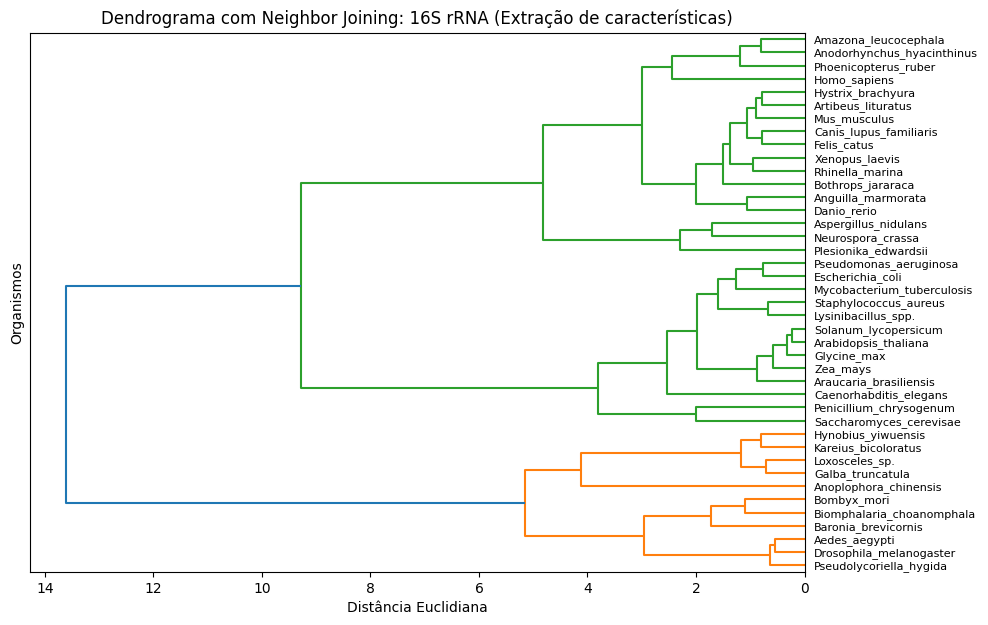

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

#Criar árvore filogenética
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendrograma com Neighbor Joining: 16S rRNA (Extração de características)")
labels= [seq.metadata['id'] for seq in seqs]
dend = shc.dendrogram(shc.linkage(distancia, method='ward'), labels=labels, orientation='left')
plt.xlabel('Distância Euclidiana')
plt.ylabel('Organismos')


print(labels)

# Avaliando a acurácia das árvores geradas

Coeficiente de Silhouette

In [ ]:
from sklearn.metrics import silhouette_score

# Calcular el coeficiente de Silhouette para cada árbol
silhouette_1 = silhouette_score(distance_matrix, cluster_labels_1, metric='precomputed')
silhouette_2 = silhouette_score(distancia_qc, cluster_labels_2, metric='precomputed')

print("Silhouette Score para el árbol 1:", silhouette_1)
print("Silhouette Score para el árbol 2:", silhouette_2)

Silhouette Score para el árbol 1: 0.2905391834526372
Silhouette Score para el árbol 2: 0.41052344352411585


In [ ]:
import pandas as pd
import numpy as np
from Bio import SeqIO
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import hamming


alignment_file = "/content/16sRNA_alinhamento_oficial"
aligned_sequences = [str(record.seq) for record in SeqIO.parse(alignment_file, "fasta")]

#Distância de Hamming entre pares de sequências alinhadas
pairs = []
divergence = []

for i in range(len(aligned_sequences)):
    for j in range(i + 1, len(aligned_sequences)):
        dist = hamming(list(aligned_sequences[i]), list(aligned_sequences[j]))
        pairs.append((aligned_sequences[i], aligned_sequences[j]))
        divergence.append(dist)

all_chars = set()
for seq in aligned_sequences:
    all_chars.update(list(seq))

#Configuração do LabelEncoder para incluir todos os caracteres únicos
encoder = LabelEncoder()
encoder.fit(list(all_chars))

#Codificar cada seqeuência e calcular as diferenças entre elas
encoded_pairs = []
for seq1, seq2 in pairs:
    seq1_encoded = encoder.transform(list(seq1))
    seq2_encoded = encoder.transform(list(seq2))
    encoded_pairs.append(np.abs(seq1_encoded - seq2_encoded))

# Converta para DataFrame
X = pd.DataFrame(encoded_pairs)
y = np.array(divergence)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Predição e avaliação
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Erro Médio Quadrático:", mse)

accuracy = model.score(X_test, y_test)
print(f"Acurácia do modelo: {accuracy:.2f}")

Erro Médio Quadrático: 0.0003954251878532867
Acurácia do modelo: 0.99


#Classificador de sequências

In [ ]:
X= normal_df
url2 = 'https://raw.githubusercontent.com/maritaortiz/Projeto_ICD/9d6141d22917408d29a7d6fd9528fa9fed37bf06/classifier.csv'
df2=pd.read_csv(url2)
y=df2['category']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Dividir em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o classificador
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Avaliar o classificador
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
model_accuracy = clf.score(X_test, y_test)
print(model_accuracy)

              precision    recall  f1-score   support

    Bacteria       0.50      1.00      0.67         2
        Bird       0.00      0.00      0.00         0
        Fish       0.00      0.00      0.00         0
       Fungi       0.00      0.00      0.00         3
      Insect       1.00      0.50      0.67         4
      Mammal       0.25      1.00      0.40         1
      Molusc       0.00      0.00      0.00         1
       Plant       0.00      0.00      0.00         0
     Reptile       0.00      0.00      0.00         1
       Yeast       0.00      0.00      0.00         1

    accuracy                           0.38        13
   macro avg       0.17      0.25      0.17        13
weighted avg       0.40      0.38      0.34        13

0.38461538461538464


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
kmers2= list(kmers)
input_seq= input("Digite a sequência de DNA: ")

#Tratamento da sequência de entrada
input_seq_encoded = [input_seq.count(k) for k in kmers2]
input_seq_encoded = np.array(input_seq_encoded).reshape(1, -1)

#Verifica se a sequência de entrada contém algum dos k-mers
if np.all(input_seq_encoded == 0):
    raise ValueError("The input sequence does not contain any of the specified k-mers.")

#Normalização
input_features = scaler.transform(input_seq_encoded)

#Predição
X_new = pd.DataFrame(input_features)
y_new = clf.predict(X_new)
print(f"O organismo pertence à categoria: {y_new[0]}")

#Acurácia da predição
accuracy_new = clf.score(X_new, y_new)
print(f"Acurácia da predição: {accuracy_new}")

#Características
texto= y_new[0]
df3=df2.drop(columns="animal_name")
row = df3.loc[df3['category'] == texto]
print(f"Características do organismo: \n {row}")

Digite a sequência de DNA: TTCTAAATTTATTGCACTAATCTGCCAAAATAGTAAATTATTTTAATAATTTTCAATTTCATAAAATTATATTTTTTATATTAGGTCCTTTCGTACTACAATATAATAATTAATTAAAGATAGAAACCAACCTGGCTTACACCGGTTTGAACTCAGATCATGTAAGAATTCAAAGGTCGAACAGACCTAAACTTTAAACTTCTACACCTAAAAATAACTCTTAATCCAACATCGAGGTCGCAATCTTTTTTATCGATATGAACTCTCTAAAAAAATTACGCTGTTATCCCTAAGGTAACTTAAATTTTTAATCCATAAAATAGGATCTTTTATTCATAAATTTATGTAAATAAATAATAAAAGTTAATTTAATTTTAATACCACCCCAGTAAAATTTTATCTAAAATATAATTATTAAAATTCTTTATAAATTATAATTTATAAAAATAAAGATCTATAGGGTCTTCTCGTCTTTTAATTATATTTTAACTTTTTAATTAAAAAATAAAGTTCTAAAAAATTTTTAAAAAAACAGTATATATCTCATTCAACCATTCATACCAGCCTTCAATTAAAAGACTATTGATTATGCTACCTTCGCACGGTCAAAATACCGCGGCCCTTTAAAATTCAGTGGGCAGGTTAGACTTTAAATAAAATACAAAAAGACATGTTTTTGATAAACAGGTGAATATATTTAATTTGCCGAATTCTTCATTAAAACCTAACAATTAAATTATATTATAAAAATAAATATACTAATTTTATCATAATTACTAAATTTTTTTTATTAAAATTTAAATTTTAATAAAAAATTTAATTTAAATTAAATAATTTTTAATAAAAAATAAATTATAACAAATTTATTAATAATAGCTATTTTTAAGCTTATATTTATTTTAAAAATTATAAAAATATAAAAATTTATCTTAAAGCTCATCCCTTAAAATATTATTTTATTAATTTATTAAAT

In [ ]:
# Sequências de teste
"TTTATGGAGAGTTTGATCCTGGCTCAGAGTGAACGCTGGCGGCGTGCCTAATACATGCAAGTCGAACGATGAAGCTTCTAGCTTGCTAGAGTGCTGATTAGTGGCGCACGGGTGAGTAACGCATAGGTCATGTGCCTCTTAGTTTGGGATAGCCATTGGAAACGATGATTAATACCAGATACTCCCTACGGGGGAAAGATTTATCGCTAAGAGATCAGCCTATGTCCTATCAGCTTGTTGGTAAGGTAATGGCTTACCAAGGCTATGACGGGTATCCGGCCTGAGAGGGTGAACGGACACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTAGGGAATATTGCTCAATGGGGGAAACCCTGAAGCAGCAACGCCGCGTGGAGGATGAAGGTTTTAGGATTGTAAACTCCTTTTGTTAGAGAAGATAATGACGGTATCTAACGAATAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTACTATTCTAGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTGATTGCGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCCTAAACGATGGATGCTAGTTGTTGGAGGGCTTAGTCTCTCCAGTAATGCAGCTAACGCATTAAGCATCCCGCCTGGGGAGTACGGTCGCAAGATTAAAACTCAAAGGAATAGACGGGGACCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGATACACGAAGAACCTTACCTAGGCTTGACATTGAGAGAATCCGCTAGAAATAGTGGAGTGTCTAGCTTGCTAGACCTTGAAAACAGGTGCTGCACGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGCAACGAGCGCAACCCCCTTTCTTAGTTGCTAACAGGTTATGCTGAGAACTCTAAGGATACTGCCTCCGTAAGGAGGAGGAAGGTGGGGACGACGTCAAGTCATCATGGCCCTTACGCCTAGGGCTACACACGTGCTACAATGGGGTGCACAAAGAGAAGCAATACTGTGAAGTGGAGCCAATCTTCAAAACACCTCTCAGTTCGGATTGTAGGCTGCAACTCGCCTGCATGAAGCTGGAATCGCTAGTAATCGCAAATCAGCCATGTTGCGGTGAATACGTTCCCGGGTCTTGTACTCACCGCCCGTCACACCATGGGAGTTGTGTTTGCCTTAAGTCAGGATGCTAAATTGGCTACTGCCCACGGCACACACAGCGACTGGGGTGAAGTCGTAACAAGGTAACCGTAGGTGAACCTGCGGCTGGATCACCTCCTT"
"AAGCCTACCCTAGCTCCACCAACCATAATCAAGAACCCACCACCTCACCCAACCAAAACATTCTCATCCAACCTAGTATAGGCGATAGAAAAGTGCAACTCGGACGCCATAGAAAAAGTACCGCAAGGGAAAGATGAAATAACAATGAAAACCAAGCACCACATAGCAAAGACAAACCCTTGTACCTCTTGCATCATGATTTAGCAAGAACAACCAGACAAAGCGAGCTTAAGCCTGCCACCCCGAAACCCAAGCGAGCTACTAACAAGCAGCTGCCCCGAGCCAACCCGTCTCTGTTGCAAAAGAGTGGGACGACTTATTAGTAGAGGTGAAAAGCCAACCGAGCTGAGTGATAGCTGGTTACCTGCAAAACGAATTTGAGTTCTACCTCAGCCCCTTCCCCAAGACAAACCAATCAAGTCCCCATGCAATGGGCTAAGAGCTATTTAAAGGGGGTACAGCCCCTTTAAAAAAGGATACAACCTCCACCAGCGGATAACCCCACCCCAACCTAGCCCCCGTGGGCCTTAAAGCAGCCACCCTTAAAGAACGCGTCAAAGCTCTACAAACTAAAAAATCCAAAAACAACGTAAATCCCTGAACCCATAGCAGGTCAACCTACAACAGTAGATGAATCAATGCTAAAACGAGTAACCAGGACACCAAGTCCCCTAAAGCGCCAACCTAAACACCATTAACAGCACAACCCCAATACCAAACCCCCGACTAAACATTGAGCACACCCTGTCAGACCAACCCAGGAGCGCACACTAGGATGATTAAAATCTGCAGAAGGAACTCGGCAAACCTAAGACCCGACTGTTTACCAAAAACATAGCCTTCAGCCGAACAAGTATTGAAGGTGATGCCTGCCCAGTGACACACGTTTAACGGCCGCGGTATCCTAACCGTGCAAAGGTAGCGCAATCAATTGTCCCATAAATCGAGACCTGTATGAACGGCTAAACGAGGCCTTAGCTGTCTCCTGCAGATAATCAGTGAAATTGATCCCTCTGTACAAAAGCAGAGATGAACACATAAGACGAGAAGACCCTGTGGAACTTCAAAATCAATAGCCACCACACCCAACCTACAAACCCACCAGGCTCACTACCCAAAAACACTGGCTAACATTTTTAGGTTGGGGCGACCTTGGAGAAAAACAAACCCTCCAAAAATAGGGCCAACCCCCTAACTAAGAGCAACCCCTCAACGTGCCAACAGCACCCAGACCCAGTAAAACTGACCAATGAACCAAGCTACCCCAGGGATAACAGCGCAATCTCCCCCAAGAGCCCCTATCGACGAGGAGGTTTACGACCTCGATGTTGGATCAGGACATCCTAGTGGTGCAGCCGCTACTAAGGGTTCGTTTGTTCAACGATTAACAGTCCTACGTGATCTGAGTTCAGACCGGAGTAATCCAGGTCGGTTTCTATCTATGATTAGCCTTTCCCAGTACGAAAGGACCGGAAAGATAGGGCCAATGCCCCAAGTACGCCCTCTCCCTAAGCGATGTACTCAACTAAATCACTAAAGGACCACACATAACCCCAACGAAAAAGGCT"
"TTCTAAATTTATTGCACTAATCTGCCAAAATAGTAAATTATTTTAATAATTTTCAATTTCATAAAATTATATTTTTTATATTAGGTCCTTTCGTACTACAATATAATAATTAATTAAAGATAGAAACCAACCTGGCTTACACCGGTTTGAACTCAGATCATGTAAGAATTCAAAGGTCGAACAGACCTAAACTTTAAACTTCTACACCTAAAAATAACTCTTAATCCAACATCGAGGTCGCAATCTTTTTTATCGATATGAACTCTCTAAAAAAATTACGCTGTTATCCCTAAGGTAACTTAAATTTTTAATCCATAAAATAGGATCTTTTATTCATAAATTTATGTAAATAAATAATAAAAGTTAATTTAATTTTAATACCACCCCAGTAAAATTTTATCTAAAATATAATTATTAAAATTCTTTATAAATTATAATTTATAAAAATAAAGATCTATAGGGTCTTCTCGTCTTTTAATTATATTTTAACTTTTTAATTAAAAAATAAAGTTCTAAAAAATTTTTAAAAAAACAGTATATATCTCATTCAACCATTCATACCAGCCTTCAATTAAAAGACTATTGATTATGCTACCTTCGCACGGTCAAAATACCGCGGCCCTTTAAAATTCAGTGGGCAGGTTAGACTTTAAATAAAATACAAAAAGACATGTTTTTGATAAACAGGTGAATATATTTAATTTGCCGAATTCTTCATTAAAACCTAACAATTAAATTATATTATAAAAATAAATATACTAATTTTATCATAATTACTAAATTTTTTTTATTAAAATTTAAATTTTAATAAAAAATTTAATTTAAATTAAATAATTTTTAATAAAAAATAAATTATAACAAATTTATTAATAATAGCTATTTTTAAGCTTATATTTATTTTAAAAATTATAAAAATATAAAAATTTATCTTAAAGCTCATCCCTTAAAATATTATTTTATTAATTTATTAAATTAATGAAATTAAATTAATAAAATTAATAAACTAAATTAAATTTATTTCTTAAAAAACTAGATATATTTTAAAGCGATTAACGTTTCATTTCTAATTATATATTTAAAATATTTATTCTACAATAACTTTATTATATAATTAAATCTTTAAAATTCGAGAAAAATTAATATAATAATTTATTAATTAATAAACCCTGATACACAAGGTACAATAAATTAAATTTTCTTTTAATTTAAAAATTTTTCAAATTATTTCAATATTCTTTTAAAATACTAATACACTATAATTAAAATTATTATTTCATTATAAATTACTAAAACTAATAAATTTAAAATTATTTTTATTAAAAATAATAAACAAAAAAAAATAATTAATAAATAATTATTATC"